In [1]:

%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
import pandas as pd

np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state





Question 1:

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs

from sklearn.model_selection import train_test_split


labels = ["b", "r"]
X, y = make_blobs(n_samples=400, centers=23,n_features=5, random_state=42)
y = np.take(labels, (y < 10))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


rfc = RandomForestClassifier(n_estimators=20, bootstrap=False, max_features=5)
rfc.fit(X_train,y_train)

dtc = DecisionTreeClassifier(max_features=5)
dtc.fit(X_train,y_train)


print(rfc.score(X_test,y_test))
print(dtc.score(X_test,y_test))


0.9875
0.9875


We built a forest made of the same trees by disabling bootstrap and considering all the features of the 'toy' dataset
Forest composed this way behaves like a single tree (the accuracy is the same)

In [30]:
rfc = RandomForestClassifier(n_estimators=20, max_features=5)
rfc.fit(X_train,y_train);


In [31]:
from scipy.stats.stats import pearsonr
tree_9 = rfc.estimators_[8].predict(X_test)
ytest_15 = rfc.estimators_[14].predict(X_test)
pr=pearsonr(tree_9, ytest_15)
print(pr[0])

0.7970309646824358


To check whether trees in the same forest are not completely correlated we pick two random trees and did prediction on the test dataset; For the results of these predictions we calculated Pearson correlation coefficient and got value < 1 => trees are not completelty correlated because this time we enabled bootstraping 

Random forest on Bank Marketing dataset

In [32]:
data= pd.read_csv('C:/Users/Evgeniy/Desktop/Advanced computing/bank-additional-full.csv',sep=';')
var_names=data.columns.tolist()
categ=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']
quantit=[i for i in var_names if i not in categ]

job=pd.get_dummies(data['job'])
marital = pd.get_dummies(data['marital'])
education = pd.get_dummies(data['education'])
default = pd.get_dummies(data['default'])
housing = pd.get_dummies(data['housing'])
loan = pd.get_dummies(data['loan'])
contact = pd.get_dummies(data['contact'])
month = pd.get_dummies(data['month'])
day = pd.get_dummies(data['day_of_week'])
poutcome = pd.get_dummies(data['poutcome'])

dict_map=dict()
y_map={'yes':1, 'no': 0}
dict_map['y']=y_map
data=data.replace(dict_map)
label=data['y']

df1 = data[quantit]
df1_names = df1.keys().tolist()


df1 = pd.DataFrame(df1)
df1.columns = df1_names

banking = pd.concat([df1,
                      job,
                      marital,
                      education,
                      default,
                      housing,
                      loan,
                      contact,
                      month,
                      day,
                      poutcome,
                      label], axis=1)

#banking.to_csv('bank_cleaned.csv', index = False)


Banking data after processing

In [33]:
banking.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,sep,fri,mon,thu,tue,wed,failure,nonexistent,success,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0


In [37]:
X_train.shape

(32950, 63)

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import GridSearchCV
#from sklearn.pipeline import make_pipeline


Xb = banking.iloc[:, :-1]
yb = banking.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(Xb, yb, test_size = 0.2, random_state = 1)



rfc = RandomForestClassifier(n_estimators=20, bootstrap=False, max_features=63, random_state=1)
rfc.fit(X_train,y_train)

dtc = DecisionTreeClassifier(max_features=63,  random_state=1)
dtc.fit(X_train,y_train)


print(rfc.score(X_test,y_test))
print(dtc.score(X_test,y_test))

0.8936635105608157
0.8935421218742413


Using the banking dataset a single tree and a forest behave almost the same way

In [41]:
rfc = RandomForestClassifier(n_estimators=20)
rfc.fit(X_train,y_train);

from scipy.stats.stats import pearsonr
tree_9 = rfc.estimators_[8].predict(X_test)
ytest_15 = rfc.estimators_[14].predict(X_test)
pr=pearsonr(tree_9, ytest_15)
print(pr[0])

0.3907935710870197


< 1 => trees are not completelty correlated

Question 2:

In [42]:
from sklearn.model_selection import GridSearchCV



parameter_gridsearch = {
                 'max_depth' : [3, 5, 7, 15], 
                 #'n_estimators': [50],  
                 #'max_features': ['sqrt', 'auto', 'log2'],      
                 'min_samples_split': [2, 6, 8],      
                 'min_samples_leaf': [2, 4, 8, 12]
                # 'bootstrap': [True, False],
                 }

randomforest = RandomForestClassifier(n_estimators=50)


gridsearch = GridSearchCV(randomforest,                                 
                               scoring='accuracy',
                               param_grid=parameter_gridsearch)


gridsearch.fit(X_train, y_train) 
parameters = gridsearch.best_params_

In [43]:
#The optimal parameters found by grid search
parameters

{'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 6}

In [44]:
gridsearch.score(X_test, y_test)

0.9121145909201263

Question 3:

In [57]:
from sklearn.datasets.california_housing import fetch_california_housing

cal_housing = fetch_california_housing()
names = cal_housing.feature_names

In [58]:
names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

Text(0,0.5,'Longitude')

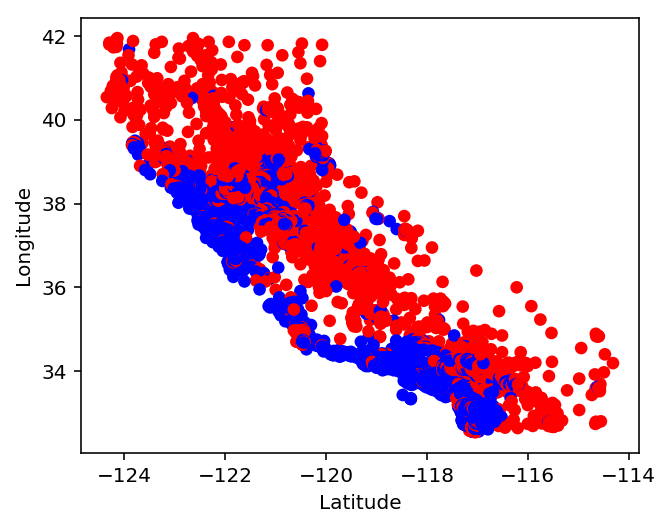

In [82]:
import matplotlib.pyplot as plt

x_index = 7
y_index = 6

labels = ['b', 'r']

#y = np.take([0, 1], (y < 1))

y_label = np.take(labels, (cal_housing.target < 1.5))


plt.figure(figsize=(5, 4))
plt.scatter(cal_housing.data[:, x_index], cal_housing.data[:, y_index], c=y_label, lw=0, s=40)


plt.xlabel('Latitude')
plt.ylabel('Longitude')

In [84]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor

X_train, X_test, y_train, y_test = train_test_split(cal_housing.data, cal_housing.target, test_size=0.2, random_state=1)
names = cal_housing.feature_names
rfc = RandomForestRegressor(n_estimators=300)
etr = ExtraTreesRegressor(n_estimators=300)
gbr = GradientBoostingRegressor(learning_rate=0.2, n_estimators=300)

rfc.fit(X_train, y_train)
etr.fit(X_train, y_train)
gbr.fit(X_train, y_train)




print(rfc.score(X_test,y_test))
print(etr.score(X_test,y_test))
print(gbr.score(X_test,y_test))


0.8074861006856635
0.8110437728614738
0.8276699065187779


In [90]:
len(rfc.feature_importances_)
ks = np.arange(1, len(rfc.feature_importances_)+1, 1)
len(ks)

8

Feature importance obtained with different methods:

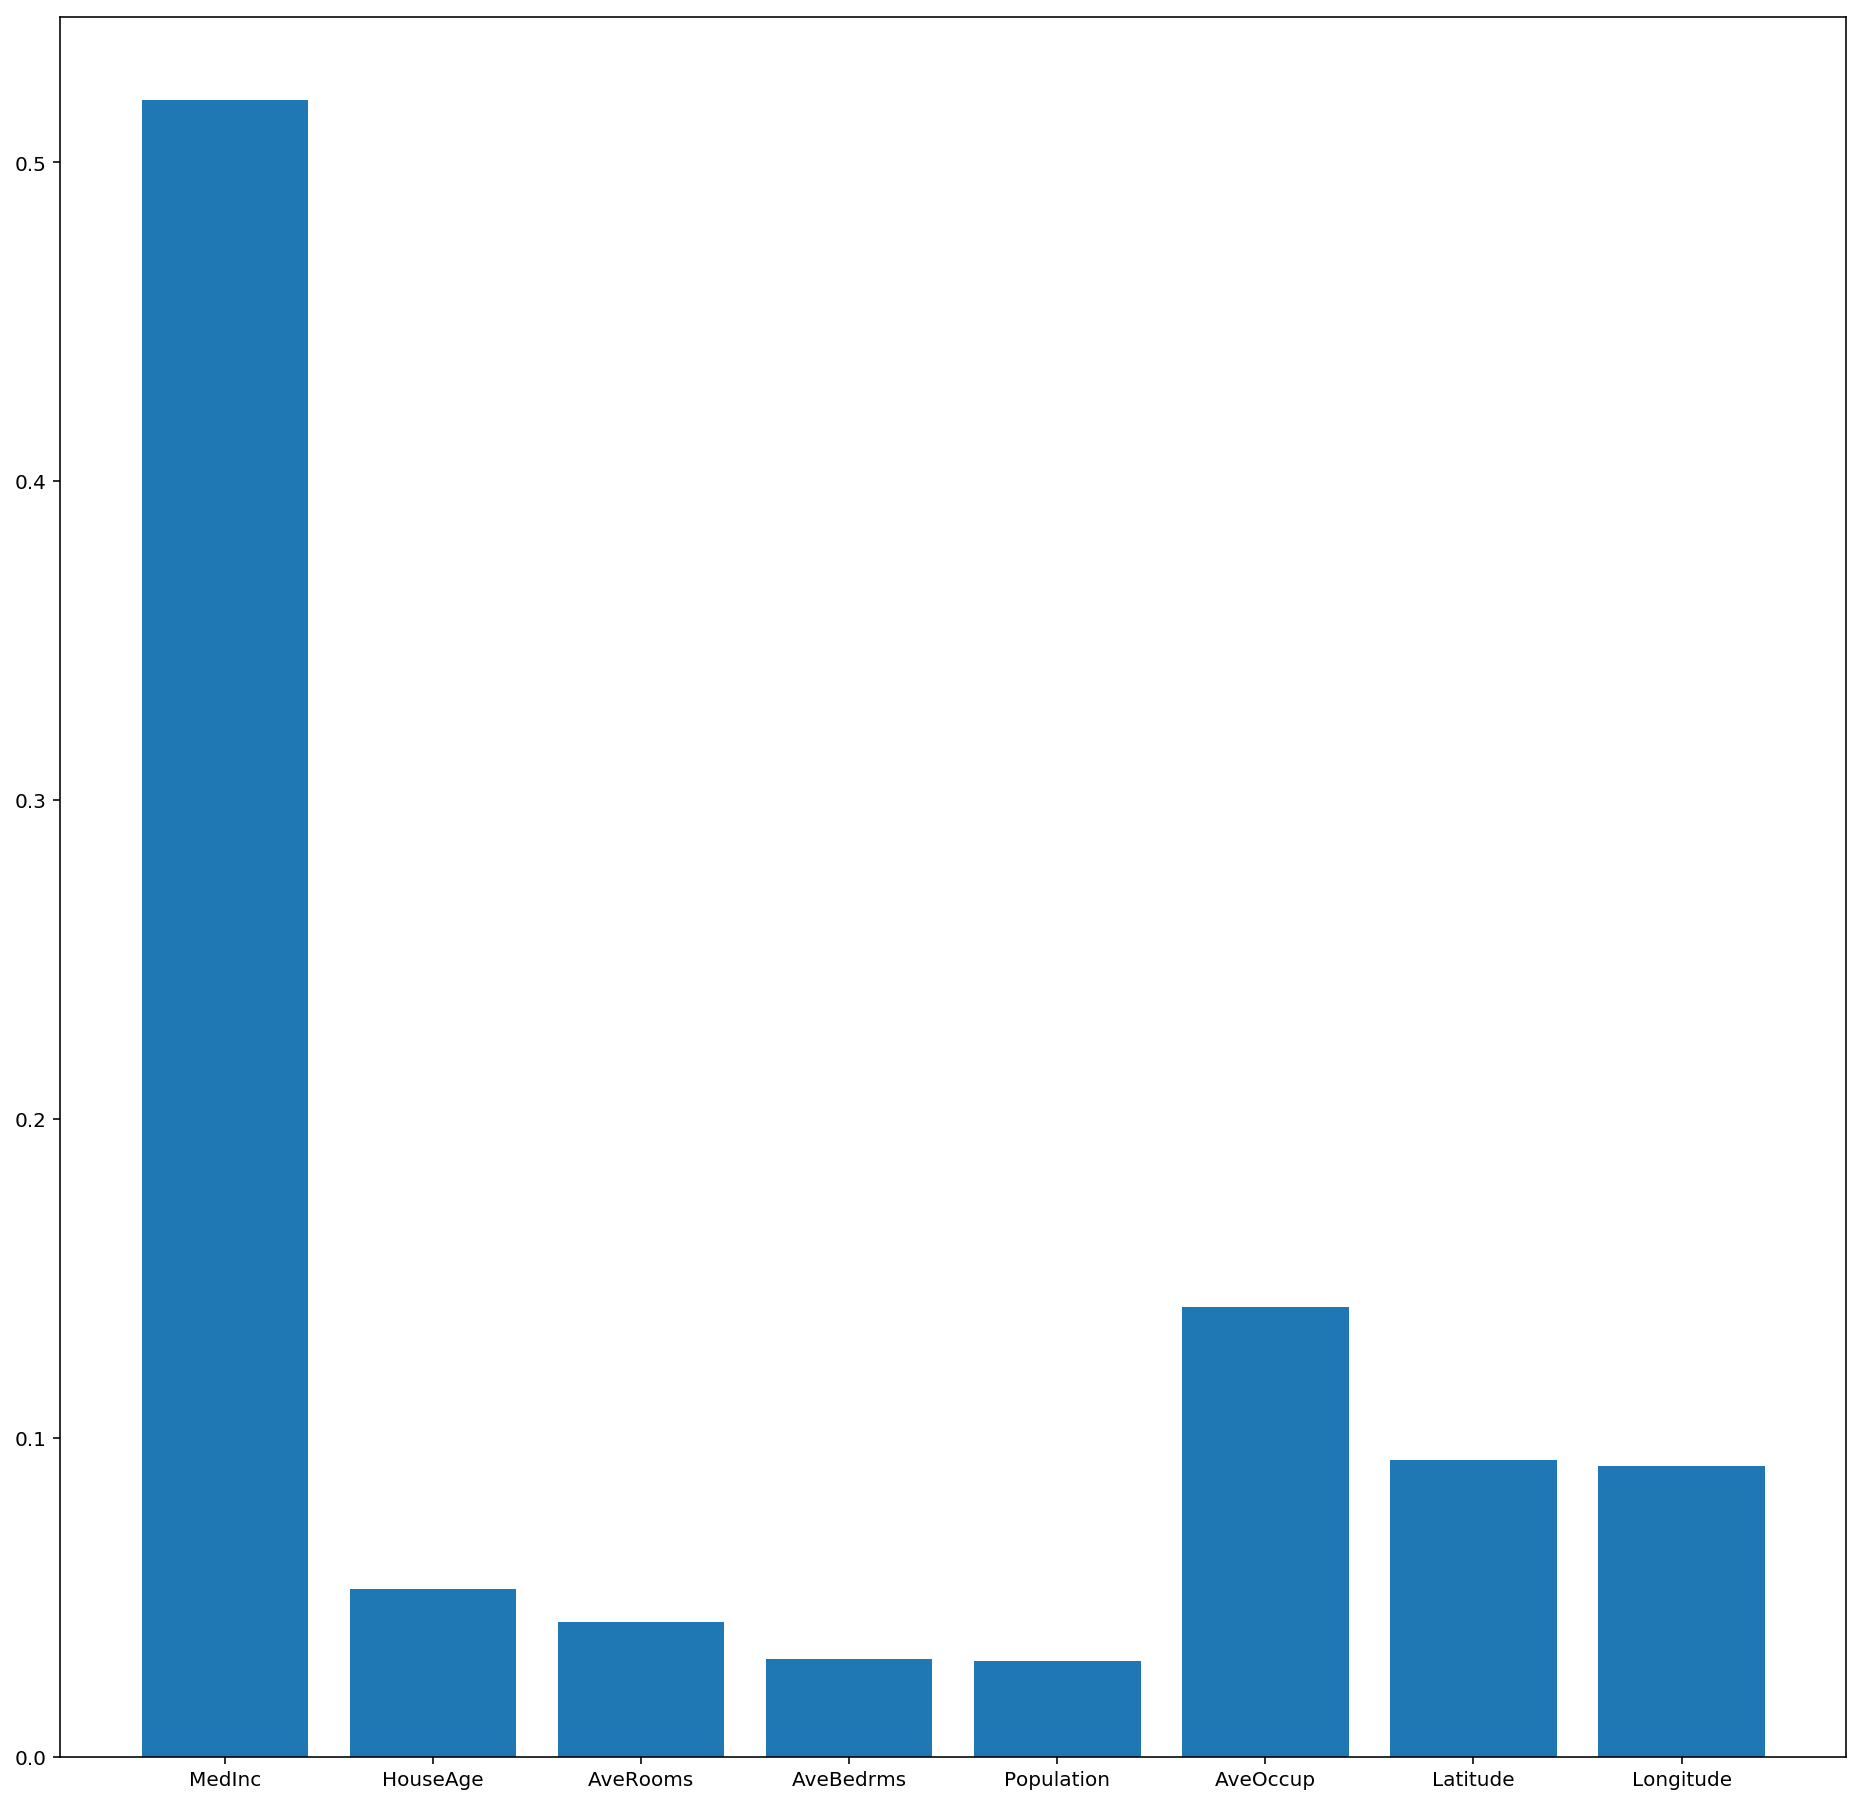

In [99]:
import matplotlib.pyplot as plt

ks = np.arange(1, len(rfc.feature_importances_)+1, 1)

fig=plt.bar(ks, rfc.feature_importances_)
plt.xticks(ks, cal_housing.feature_names)
plt.rcParams["figure.figsize"] = (16, 16)
#fig.set_size_inches(18.5, 10.5)

plt.show()


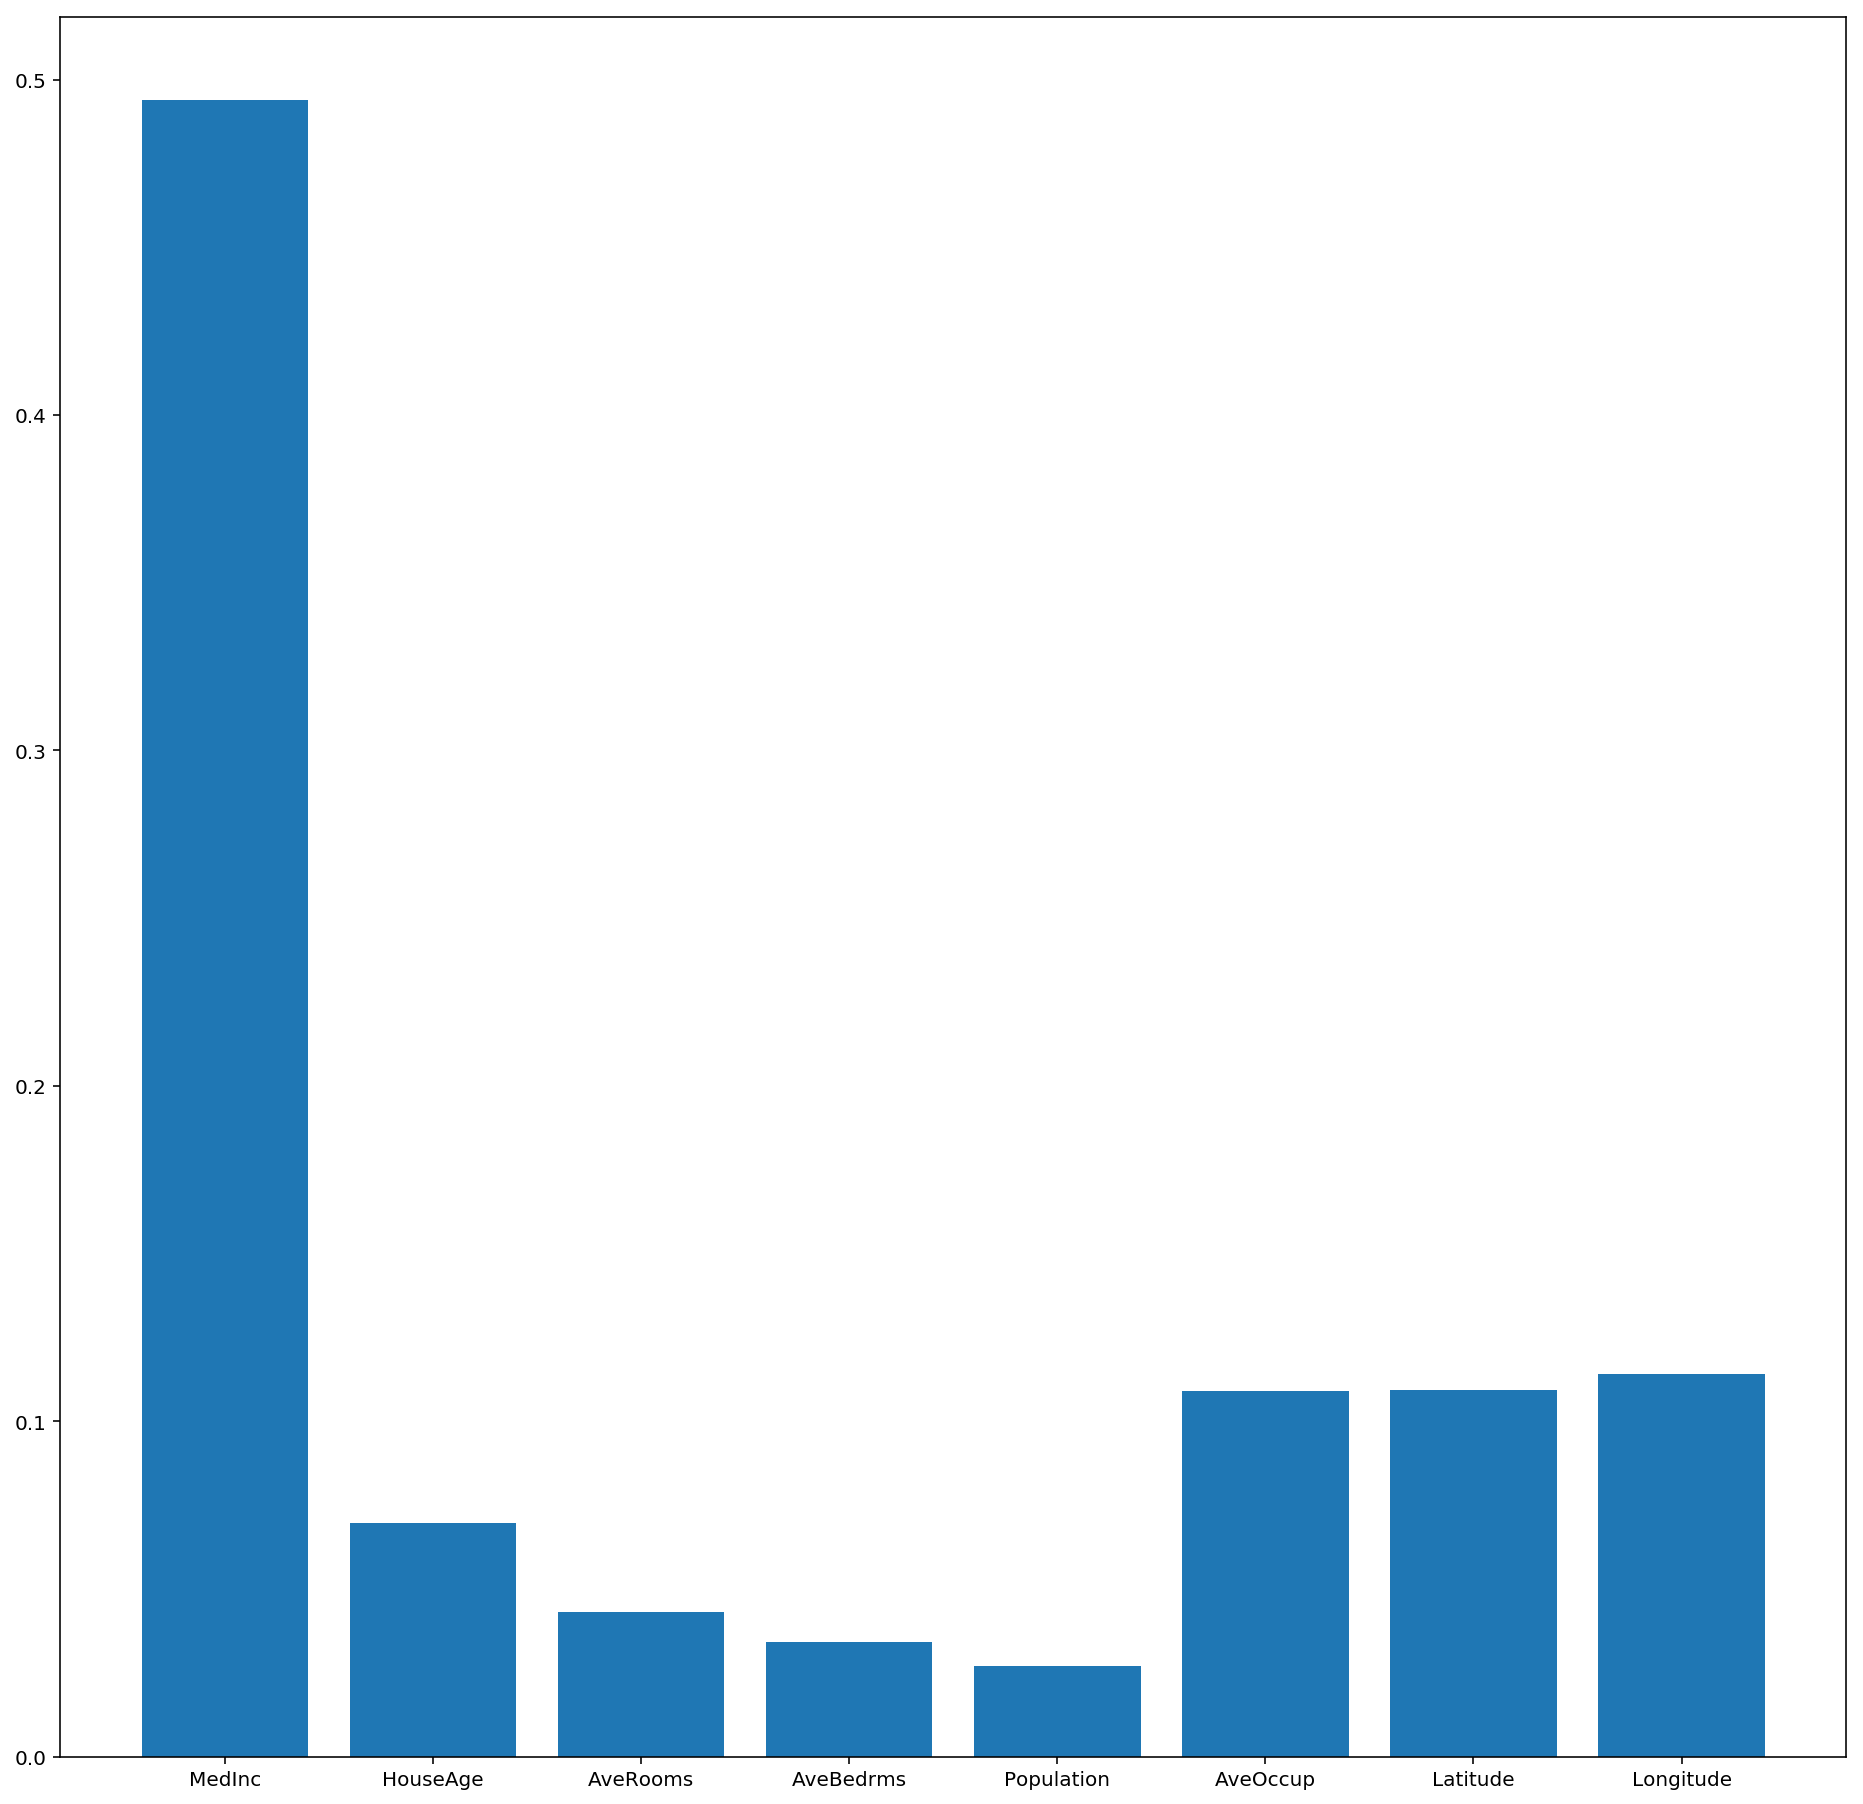

In [100]:
import matplotlib.pyplot as plt

ks = np.arange(1, len(etr.feature_importances_)+1, 1)

fig=plt.bar(ks, etr.feature_importances_)
plt.xticks(ks, cal_housing.feature_names)
plt.rcParams["figure.figsize"] = (16, 16)
#fig.set_size_inches(18.5, 10.5)

plt.show()


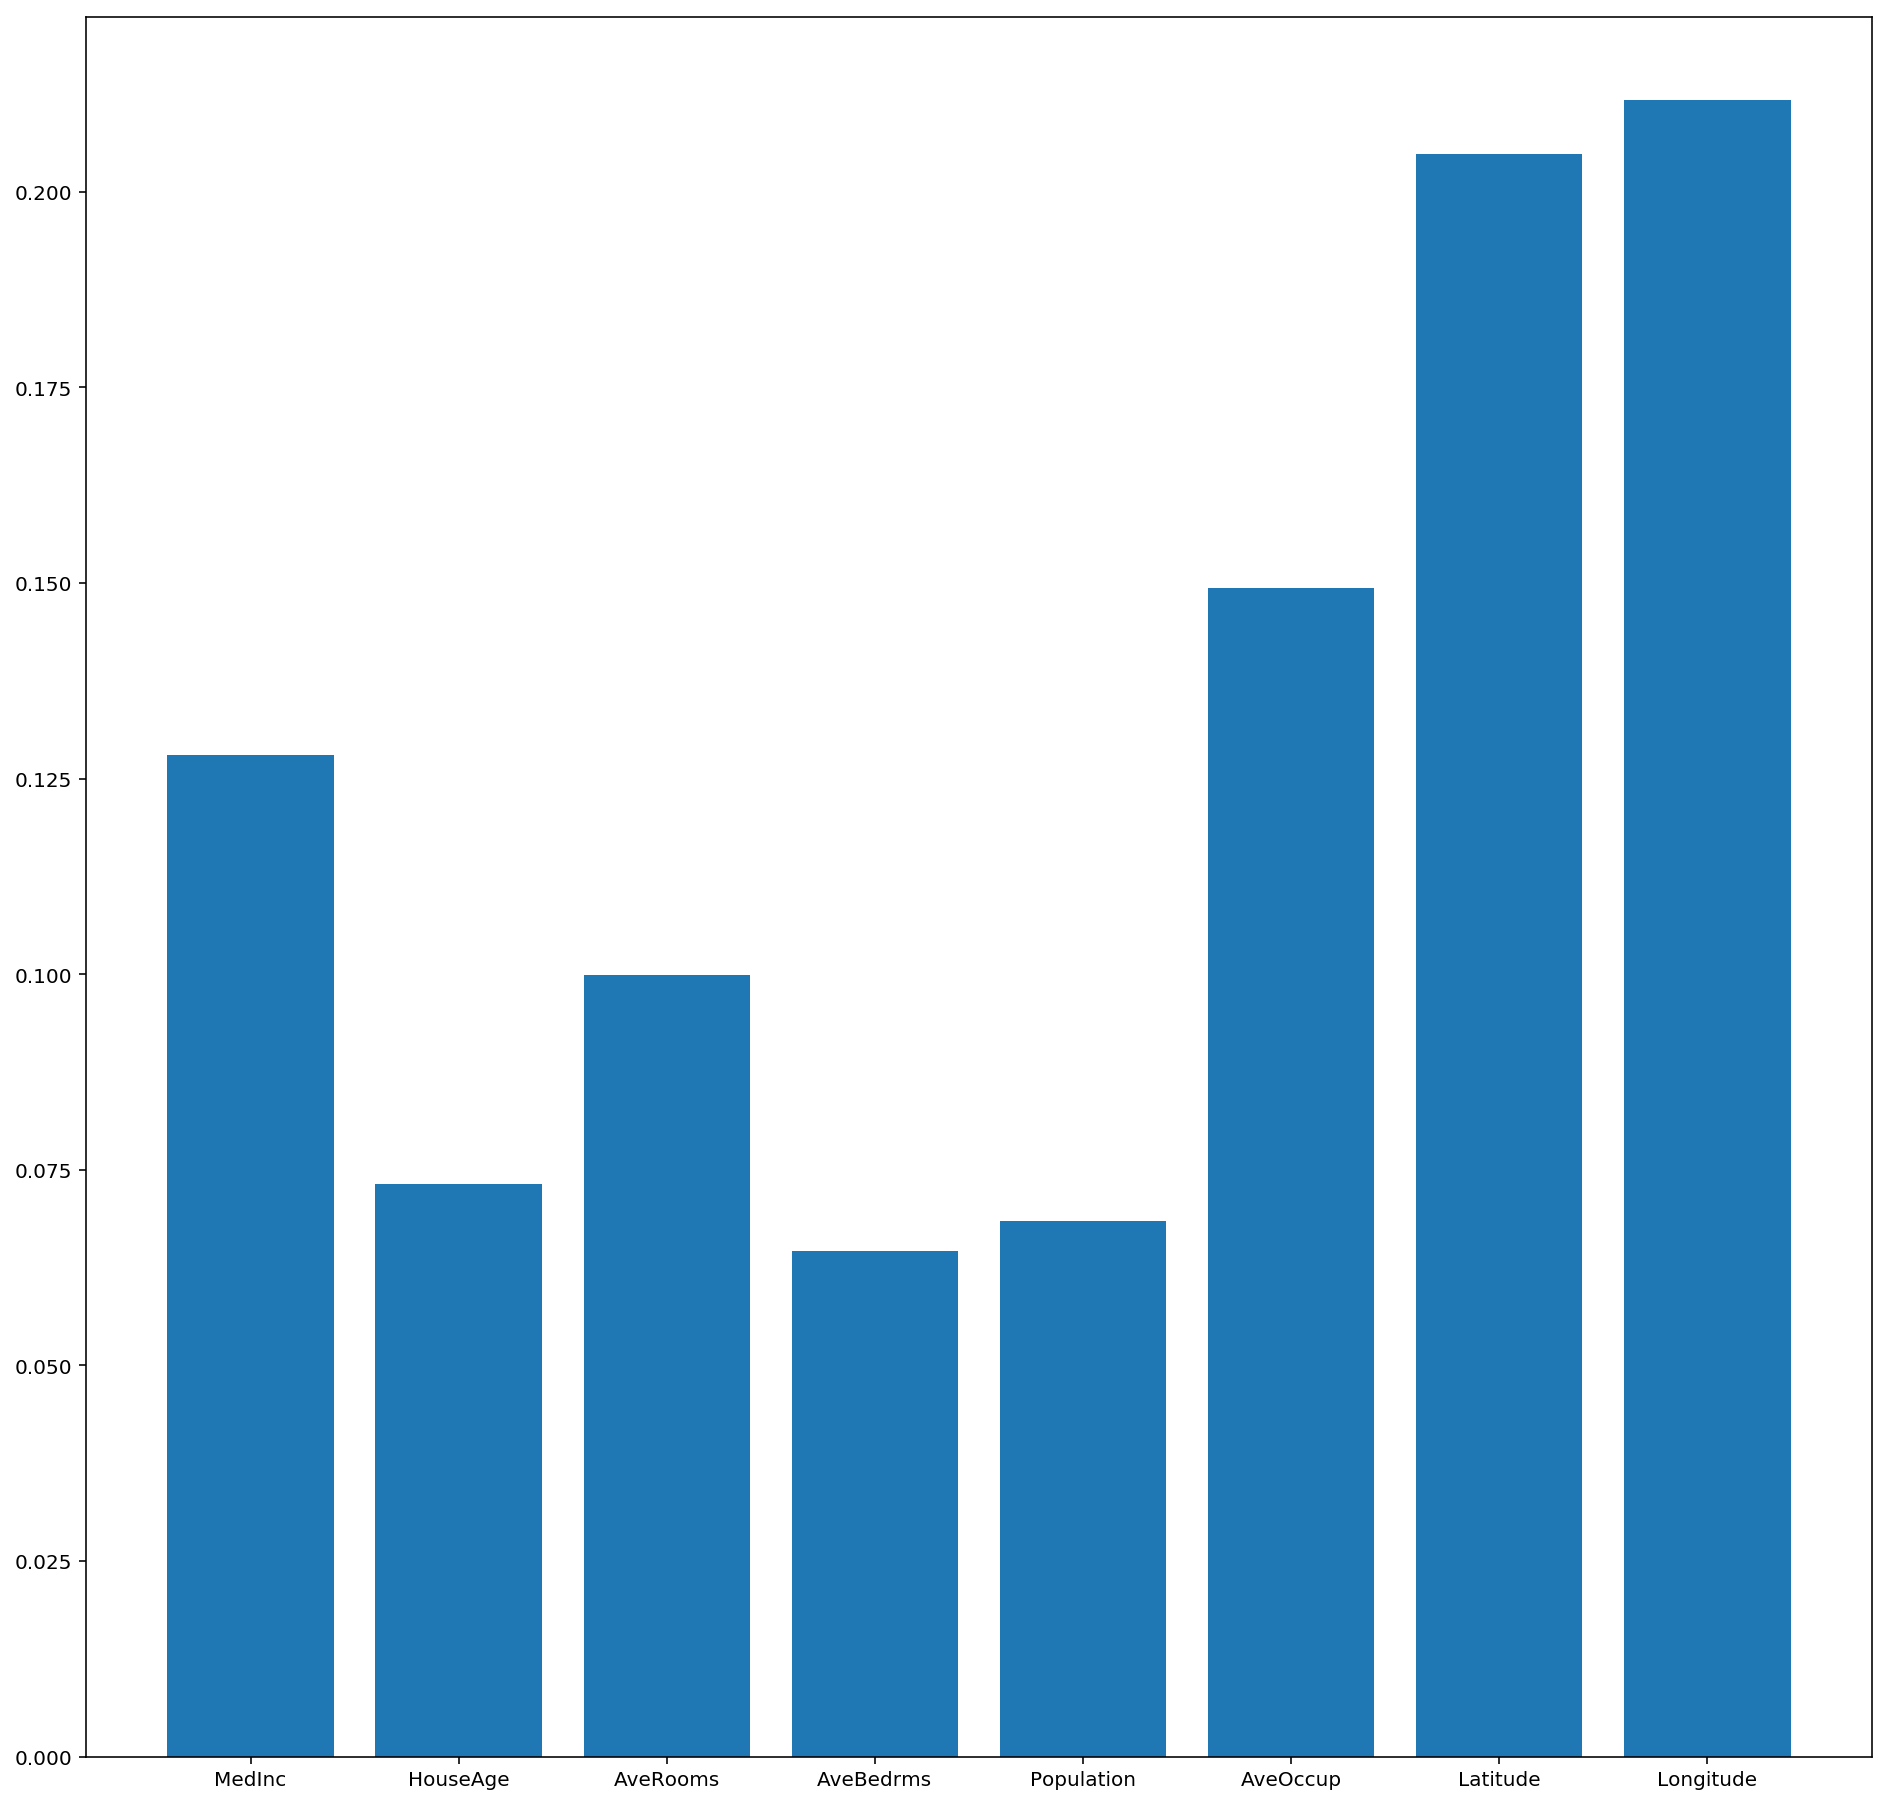

In [101]:
import matplotlib.pyplot as plt

ks = np.arange(1, len(gbr.feature_importances_)+1, 1)

fig=plt.bar(ks, gbr.feature_importances_)
plt.xticks(ks, cal_housing.feature_names)
plt.rcParams["figure.figsize"] = (16, 16)
#fig.set_size_inches(18.5, 10.5)

plt.show()


Question 4:

In [103]:
df_train = pd.read_csv('C:/Users/Evgeniy/Desktop/Advanced computing/challenge-train.csv', header=None)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,0.000576,0.999939,12.769232,0.584357,0.136273,13.359463,3.358099,14655.587891,0.005370,0.041032,...,58935.695312,74241.648438,4598.116699,2.897916,2.932629,3.193417,267,-99,0.381424,0
1,0.001807,0.999996,18.585171,0.368892,0.054991,3.600483,6.781577,4145.290527,0.030382,0.034570,...,20553.839844,12501.964844,28162.607422,3.584545,3.010242,3.322494,128,1,0.781520,1
2,0.000858,0.999304,4.794842,0.149876,0.172385,16.130068,3.723242,4936.734375,0.017344,0.027622,...,7566.020020,11801.971680,16086.186523,2.700943,2.920070,2.407294,254,-99,0.508650,0
3,0.001519,0.999969,15.656528,0.312301,0.125831,8.113082,5.763765,4948.376465,0.035185,0.038973,...,19161.880859,18598.472656,17658.548828,3.108439,2.932674,3.164568,531,-99,0.682114,0
4,0.000936,0.999978,8.998086,0.475861,0.065347,3.863127,3.675261,4757.155762,0.022795,0.046165,...,12651.365234,33099.660156,10722.979492,2.873017,3.074762,4.136894,160,5,0.633693,1


In [104]:
df_train.drop(df_train.columns[[46]], axis=1, inplace=True)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,47,48
0,0.000576,0.999939,12.769232,0.584357,0.136273,13.359463,3.358099,14655.587891,0.005370,0.041032,...,376.700348,58935.695312,74241.648438,4598.116699,2.897916,2.932629,3.193417,267,0.381424,0
1,0.001807,0.999996,18.585171,0.368892,0.054991,3.600483,6.781577,4145.290527,0.030382,0.034570,...,2028.605591,20553.839844,12501.964844,28162.607422,3.584545,3.010242,3.322494,128,0.781520,1
2,0.000858,0.999304,4.794842,0.149876,0.172385,16.130068,3.723242,4936.734375,0.017344,0.027622,...,2874.089600,7566.020020,11801.971680,16086.186523,2.700943,2.920070,2.407294,254,0.508650,0
3,0.001519,0.999969,15.656528,0.312301,0.125831,8.113082,5.763765,4948.376465,0.035185,0.038973,...,1488.869995,19161.880859,18598.472656,17658.548828,3.108439,2.932674,3.164568,531,0.682114,0
4,0.000936,0.999978,8.998086,0.475861,0.065347,3.863127,3.675261,4757.155762,0.022795,0.046165,...,342.455688,12651.365234,33099.660156,10722.979492,2.873017,3.074762,4.136894,160,0.633693,1


In [122]:
X = df_train.as_matrix()[:, :-1]
y = df_train.as_matrix()[:, -1]

In [106]:
X.shape

(45000, 47)

In [123]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)




parameter_gridsearch = {
                 'max_depth' : [ 5, 15, 25], 
                 'n_estimators': [50],  
                 #'max_features': ['sqrt', 'auto', 'log2'],      
                 'min_samples_split': [2, 6, 8],      
                 'min_samples_leaf': [2, 4, 8],
                # 'bootstrap': [True, False],
                 }

randomforest = RandomForestClassifier(max_features='sqrt')
#crossvalidation = StratifiedKFold(train[0::,0] , n_folds=5)

gridsearch = GridSearchCV(randomforest,                                 
                               scoring='roc_auc',
                               param_grid=parameter_gridsearch)


gridsearch.fit(X_train, y_train)    #train[0::,0] is as target
#model = gridsearch
parameters = gridsearch.best_params_




#clf = RandomForestClassifier(n_estimators=20, max_depth=7, random_state=1)
#clf.fit(X_train, y_train);
#clf.score(X_test,y_test)

In [124]:
parameters

{'max_depth': 25,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 50}

In [125]:
gridsearch.score(X_test, y_test)

0.9562153475170091

In [119]:
parameter_gridsearch = {
                 'learning_rate' : [0.1, 0.01], 
                 #'n_estimators': [100,500],  
                 'max_depth': [5, 15],      
                 #'min_samples_split': [2],      
                 'min_samples_leaf': [10,20],
               
                 }

GB = GradientBoostingClassifier(n_estimators=50)
#crossvalidation = StratifiedKFold(train[0::,0] , n_folds=5)

gridsearch = GridSearchCV(GB,                  
                               scoring='roc_auc',
                               param_grid=parameter_gridsearch)


gridsearch.fit(X_train, y_train)    
#model = gridsearch
parameters = gridsearch.best_params_

In [120]:
parameters

{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 10}

In [121]:
gridsearch.score(X_test, y_test)

0.9481318520446339

In [130]:
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression


from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


voting = VotingClassifier([('RF',
                            RandomForestClassifier(n_estimators=100, max_depth=25, min_samples_leaf=2, min_samples_split=8, random_state=1, max_features='sqrt')),
                           ('GB',
                            GradientBoostingClassifier(n_estimators=100,learning_rate=0.1, max_depth = 5, min_samples_leaf = 10))
                          ],
                         voting='soft', flatten_transform=True)

stacking = make_pipeline(voting,
                         
                         FunctionTransformer(lambda X: X[:, 1::2]),
                         
                         LogisticRegression())
stacking.fit(X_train, y_train)
print(stacking.score(X_train, y_train))
print(stacking.score(X_test, y_test))


0.9943055555555556
0.8688888888888889
